In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

plt.style.use('fivethirtyeight')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kerojol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kerojol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kerojol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kerojol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Preprocessing for Small Cap Companies

In [2]:
bigcap = pd.read_csv('bigcap.csv')
bigcap

Tweets Symbol  \
0     RT @SteveUrkelDude: Watchlist for tomorrow, an...   TSLA   
1     $TSLA price acting within a channel with bear ...   TSLA   
2     RT @VailshireCap: Three US-based publicly trad...   TSLA   
3     Get instant updates and free trials join here ...   TSLA   
4     RT @MMATDUK: $MMAT $MMAX\nJeff Dahn: "In July ...   TSLA   
...                                                 ...    ...   
4995  $IYT transportation index working its way out ...    FDX   
4996  Fedex Corp Shares Climb 1.8% Past Previous 52-...    FDX   
4997  Nice print for $FDX Size: 293615 Price: 246.76...    FDX   
4998  $FDX with a big breakout today that all starte...    FDX   
4999  $FDX jumped up over 5% today.\n\nThe company i...    FDX   

     Manual_Sentiment ChatGPT_Sentiment  
0             Neutral           Neutral  
1            Negative          Negative  
2             Neutral           Neutral  
3             Neutral           Neutral  
4             Neutral           Neutral  
...               ...               ...  
4995          Neutral           Neutral  
4996         Positive          Positive  
4997          Neutral           Neutral  
4998         Positive          Positive  
4999         Positive          Positive  

[5000 rows x 4 columns]

In [3]:
# Count the occurrences of each sentiment label
sentiment_counts = bigcap['Manual_Sentiment'].value_counts()

# Access the counts of each sentiment
positive_count = sentiment_counts.get('Positive', 0)
negative_count = sentiment_counts.get('Negative', 0)
neutral_count = sentiment_counts.get('Neutral', 0)

# Print the counts
print("Positive tweets:", positive_count)
print("Negative tweets:", negative_count)
print("Neutral tweets:", neutral_count)

Positive tweets: 993
Negative tweets: 265
Neutral tweets: 3742


In [4]:
# DATA PREPROCESSING

# Create a function clean the text
stop_words = set(stopwords.words('english'))

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
  text = re.sub(r'#', '', text) # Remove the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) # Remove RT
  text = re.sub(r'[^\w\s]','',text) # Remove punctuation
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyper link
  text = re.sub(r'\d+', '', text) # Remove numbers
  text = re.sub(r'\n', '', text) # remove \n
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
  cleaned_text = " ".join(tokens)

  return cleaned_text

In [5]:
bigcap['Tweets'] = bigcap['Tweets'].astype(str)
bigcap['Tweets'] = bigcap['Tweets'].apply(cleanTxt)
bigcap

Tweets Symbol  \
0     watchlist tomorrow game plan last night trim f...   TSLA   
1     tsla price acting within channel bear flag loo...   TSLA   
2     three usbased publicly traded company hold btc...   TSLA   
3     get instant update free trial join httpstcorfu...   TSLA   
4     mmat mmaxjeff dahn july tsla tesla allow inter...   TSLA   
...                                                 ...    ...   
4995  iyt transportation index working way inverse h...    FDX   
4996  fedex corp share climb past previous week high...    FDX   
4997  nice print fdx size price amount time see http...    FDX   
4998  fdx big breakout today started bounce breakout...    FDX   
4999  fdx jumped todaythe company quietly year dated...    FDX   

     Manual_Sentiment ChatGPT_Sentiment  
0             Neutral           Neutral  
1            Negative          Negative  
2             Neutral           Neutral  
3             Neutral           Neutral  
4             Neutral           Neutral  
...               ...               ...  
4995          Neutral           Neutral  
4996         Positive          Positive  
4997          Neutral           Neutral  
4998         Positive          Positive  
4999         Positive          Positive  

[5000 rows x 4 columns]

In [6]:
# Subjectivity and Polarity

#create a funciton to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Analyze to 3 categories
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#create two new columns in df
bigcap['textblob_subjectivity'] = bigcap['Tweets'].apply(getSubjectivity)
bigcap['textblob_polarity'] = bigcap['Tweets'].apply(getPolarity)
bigcap['textblob_sentiment'] = bigcap['textblob_polarity'].apply(getAnalysis)

#show dataframe with new columns
bigcap

Tweets Symbol  \
0     watchlist tomorrow game plan last night trim f...   TSLA   
1     tsla price acting within channel bear flag loo...   TSLA   
2     three usbased publicly traded company hold btc...   TSLA   
3     get instant update free trial join httpstcorfu...   TSLA   
4     mmat mmaxjeff dahn july tsla tesla allow inter...   TSLA   
...                                                 ...    ...   
4995  iyt transportation index working way inverse h...    FDX   
4996  fedex corp share climb past previous week high...    FDX   
4997  nice print fdx size price amount time see http...    FDX   
4998  fdx big breakout today started bounce breakout...    FDX   
4999  fdx jumped todaythe company quietly year dated...    FDX   

     Manual_Sentiment ChatGPT_Sentiment  textblob_subjectivity  \
0             Neutral           Neutral               0.283333   
1            Negative          Negative               0.450000   
2             Neutral           Neutral               0.066667   
3             Neutral           Neutral               0.733333   
4             Neutral           Neutral               0.000000   
...               ...               ...                    ...   
4995          Neutral           Neutral               0.500000   
4996         Positive          Positive               0.318889   
4997          Neutral           Neutral               0.650000   
4998         Positive          Positive               0.503333   
4999         Positive          Positive               0.333333   

      textblob_polarity textblob_sentiment  
0             -0.100000           Negative  
1              0.200000           Positive  
2              0.000000            Neutral  
3              0.200000           Positive  
4              0.000000            Neutral  
...                 ...                ...  
4995           0.300000           Positive  
4996          -0.085556           Negative  
4997           0.400000           Positive  
4998           0.256667           Positive  
4999           0.000000            Neutral  

[5000 rows x 7 columns]

### Accuracy of sentiment analysis of small cap companies using TextBlob against Manual Sentiment

In [7]:
manual_sentiment_bigcap = bigcap['Manual_Sentiment']
textblob_sentiment_bigcap = bigcap['textblob_sentiment']

# Calculate accuracy
accuracy = classification_report(manual_sentiment_bigcap, textblob_sentiment_bigcap)

print("Accuracy:", accuracy)

Accuracy:               precision    recall  f1-score   support

    Negative       0.12      0.23      0.16       265
     Neutral       0.76      0.48      0.59      3742
    Positive       0.22      0.46      0.30       993

    accuracy                           0.47      5000
   macro avg       0.37      0.39      0.35      5000
weighted avg       0.62      0.47      0.51      5000



### Accuracy of sentiment analysis of small cap companies using TextBlob against ChatGPT

In [8]:
chatgpt_sentiment_bigcap = bigcap['ChatGPT_Sentiment']
textblob_sentiment_bigcap = bigcap['textblob_sentiment']

# Calculate accuracy
accuracy = classification_report(chatgpt_sentiment_bigcap, textblob_sentiment_bigcap)

print("Accuracy:", accuracy)

Accuracy:               precision    recall  f1-score   support

    Negative       0.13      0.20      0.16       329
     Neutral       0.69      0.52      0.59      3209
    Positive       0.36      0.52      0.42      1462

    accuracy                           0.50      5000
   macro avg       0.40      0.41      0.39      5000
weighted avg       0.56      0.50      0.52      5000



### Accuracy of sentiment analysis of small cap companies using ChatGPT against actual sentiment (manual sentiment)

In [9]:
# Calculate accuracy
accuracy = classification_report(chatgpt_sentiment_bigcap, manual_sentiment_bigcap)

print("Accuracy:", accuracy)

Accuracy:               precision    recall  f1-score   support

    Negative       0.75      0.60      0.67       329
     Neutral       0.78      0.91      0.84      3209
    Positive       0.76      0.52      0.62      1462

    accuracy                           0.77      5000
   macro avg       0.76      0.68      0.71      5000
weighted avg       0.77      0.77      0.76      5000



In [10]:
bigcap.textblob_sentiment.value_counts().plot(kind='bar', title="Sentiment Results (TextBlob)")

<AxesSubplot: title={'center': 'Sentiment Results (TextBlob)'}>

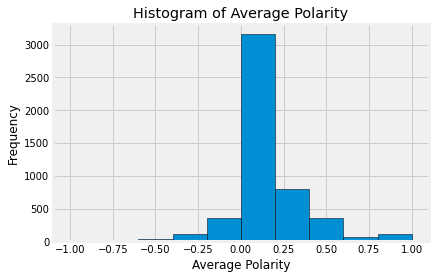

In [11]:
# Assuming you have a list of average polarity values
average_polarity = [0.2, 0.5, -0.3, 0.8, -0.1, 0.4, -0.2, 0.6, 0.7, -0.5]

# Plotting the histogram
plt.hist(bigcap['textblob_polarity'], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Average Polarity')
plt.ylabel('Frequency')
plt.title('Histogram of Average Polarity')

# Displaying the histogram
plt.show()

In [35]:
manual_sentiment_counts = bigcap['Manual_Sentiment'].value_counts()

# Count the occurrences of each sentiment label for 'textblob_sentiment' column
textblob_sentiment_counts = bigcap['ChatGPT_Sentiment'].value_counts()

# Get the unique sentiment labels
sentiment_labels = bigcap['Manual_Sentiment'].unique()

# Get the count of each sentiment label for both columns
manual_counts = [manual_sentiment_counts.get(label, 0) for label in sentiment_labels]
textblob_counts = [textblob_sentiment_counts.get(label, 0) for label in sentiment_labels]

# Sort the data in descending order
sorted_indices = np.argsort(manual_counts)[::-1]
manual_counts = np.array(manual_counts)[sorted_indices]
textblob_counts = np.array(textblob_counts)[sorted_indices]
sentiment_labels = sentiment_labels[sorted_indices]

# Set the position of the bars on the x-axis
x = range(len(sentiment_labels))

# Set the width of the bars
bar_width = 0.35

plt.figure(figsize=(10, 8))
# Create the grouped bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x, manual_counts, bar_width, label='Manual Sentiment')
rects2 = ax.bar([val + bar_width for val in x], textblob_counts, bar_width, label='ChatGPT Sentiment')

# Add labels, title, and legend
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Manual Sentiment vs ChatGPT Sentiment (Big Cap)')
ax.set_xticks([val + bar_width/2 for val in x])
ax.set_xticklabels(sentiment_labels)
ax.legend()

# Display the chart
plt.show()


<Figure size 720x576 with 0 Axes>

## Support Vector Machine

In [12]:
X = bigcap['Tweets']
y = bigcap['Manual_Sentiment']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% training data

### Feature extraction using TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Train SVM Model

In [15]:
from sklearn.svm import SVC

In [16]:
svm = SVC()
svm.fit(X_train_tfidf,y_train)
y_pred = svm.predict(X_test_tfidf)

### Evaluation of SVM


In [17]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.19      0.31        59
     Neutral       0.82      0.99      0.90       753
    Positive       0.90      0.38      0.54       188

    accuracy                           0.83      1000
   macro avg       0.88      0.52      0.58      1000
weighted avg       0.84      0.83      0.80      1000



### Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to train the SVM model
best_svm = SVC(**best_params)
best_svm.fit(X_train_tfidf, y_train)

# Make predictions on the testing data using the best model
y_pred = best_svm.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.83925
Accuracy: 0.847
Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.27      0.42        59
     Neutral       0.85      0.98      0.91       753
    Positive       0.84      0.51      0.63       188

    accuracy                           0.85      1000
   macro avg       0.86      0.58      0.65      1000
weighted avg       0.85      0.85      0.83      1000



In [19]:
#create best svm model based on gridsearchCV
svm_best = SVC(C=10, gamma='scale', kernel='rbf')
svm_best.fit(X_train_tfidf,y_train)

SVC(C=10)

In [20]:
#apply svm sentiments into dataframe
X_tfidf = vectorizer.transform(bigcap['Tweets'])

#make predictions on all the data in the dataframe
svm_predictions = svm_best.predict(X_tfidf)

#add svm senitment predictions to the dataframe
bigcap['svm_sentiment'] = svm_predictions
bigcap.head()

Tweets Symbol Manual_Sentiment  \
0  watchlist tomorrow game plan last night trim f...   TSLA          Neutral   
1  tsla price acting within channel bear flag loo...   TSLA         Negative   
2  three usbased publicly traded company hold btc...   TSLA          Neutral   
3  get instant update free trial join httpstcorfu...   TSLA          Neutral   
4  mmat mmaxjeff dahn july tsla tesla allow inter...   TSLA          Neutral   

  ChatGPT_Sentiment  textblob_subjectivity  textblob_polarity  \
0           Neutral               0.283333               -0.1   
1          Negative               0.450000                0.2   
2           Neutral               0.066667                0.0   
3           Neutral               0.733333                0.2   
4           Neutral               0.000000                0.0   

  textblob_sentiment svm_sentiment  
0           Negative       Neutral  
1           Positive      Negative  
2            Neutral       Neutral  
3           Positive       Neutral  
4            Neutral       Neutral

In [21]:
manual_sentiment = bigcap['Manual_Sentiment']
svm_sentiment = bigcap['svm_sentiment']

# Calculate accuracy
accuracy = classification_report(manual_sentiment, svm_sentiment)

print("Accuracy:", accuracy)

Accuracy:               precision    recall  f1-score   support

    Negative       0.99      0.83      0.90       265
     Neutral       0.96      0.99      0.98      3742
    Positive       0.97      0.89      0.93       993

    accuracy                           0.97      5000
   macro avg       0.98      0.91      0.94      5000
weighted avg       0.97      0.97      0.96      5000



In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
sns.countplot(data=bigcap, x='textblob_sentiment')
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Figure size 720x576 with 0 Axes>

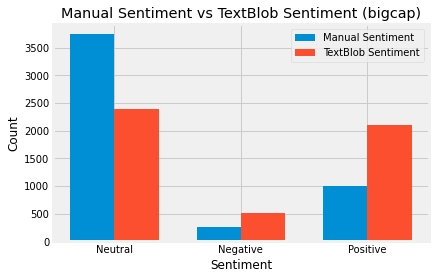

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'smallcap' and contains the 'Manual_Sentiment' and 'textblob_sentiment' columns

# Count the occurrences of each sentiment label for 'Manual_Sentiment' column
manual_sentiment_counts = bigcap['Manual_Sentiment'].value_counts()

# Count the occurrences of each sentiment label for 'textblob_sentiment' column
textblob_sentiment_counts = bigcap['textblob_sentiment'].value_counts()

# Get the unique sentiment labels
sentiment_labels = bigcap['Manual_Sentiment'].unique()

# Get the count of each sentiment label for both columns
manual_counts = [manual_sentiment_counts.get(label, 0) for label in sentiment_labels]
textblob_counts = [textblob_sentiment_counts.get(label, 0) for label in sentiment_labels]

# Set the position of the bars on the x-axis
x = range(len(sentiment_labels))

# Set the width of the bars
bar_width = 0.35

plt.figure(figsize=(10,8))
# Create the grouped bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x, manual_counts, bar_width, label='Manual Sentiment')
rects2 = ax.bar([val + bar_width for val in x], textblob_counts, bar_width, label='TextBlob Sentiment')

# Add labels, title, and legend
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Manual Sentiment vs TextBlob Sentiment (bigcap)')
ax.set_xticks([val + bar_width/2 for val in x])
ax.set_xticklabels(sentiment_labels)
ax.legend()

# Display the chart
plt.show()


In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=bigcap, x='textblob_polarity', y='textblob_subjectivity', hue='textblob_sentiment')
plt.title('Sentiment Analysis: Polarity vs. Subjectivity (bigcap)')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


## Display top 10 words in the positive, neutral, and negative classes and visualize them in a wordcloud

In [25]:
positive_tweets = bigcap[bigcap['textblob_sentiment'] == 'Positive']
neutral_tweets = bigcap[bigcap['textblob_sentiment'] == 'Neutral']
negative_tweets = bigcap[bigcap['textblob_sentiment'] == 'Negative']

In [26]:
def extract_words(tweets):
    words = []
    for tweet in tweets['Tweets']:
        words.extend(tweet.split())
    return words

positive_words = extract_words(positive_tweets)
neutral_words = extract_words(neutral_tweets)
negative_words = extract_words(negative_tweets)


In [27]:
from collections import Counter

positive_word_freq = Counter(positive_words)
neutral_word_freq = Counter(neutral_words)
negative_word_freq = Counter(negative_words)


get top 10 words

In [28]:
top_positive_words = positive_word_freq.most_common(10)
top_neutral_words = neutral_word_freq.most_common(10)
top_negative_words = negative_word_freq.most_common(10)

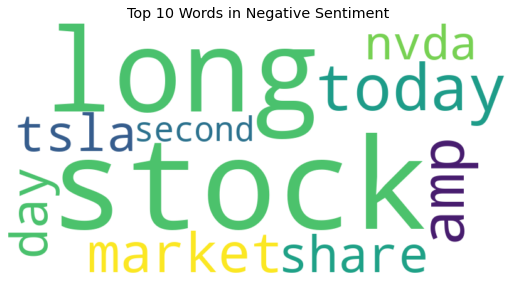

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(dict(top_positive_words), 'Top 10 Words in Positive Sentiment')
generate_wordcloud(dict(top_neutral_words), 'Top 10 Words in Neutral Sentiment')
generate_wordcloud(dict(top_negative_words), 'Top 10 Words in Negative Sentiment')

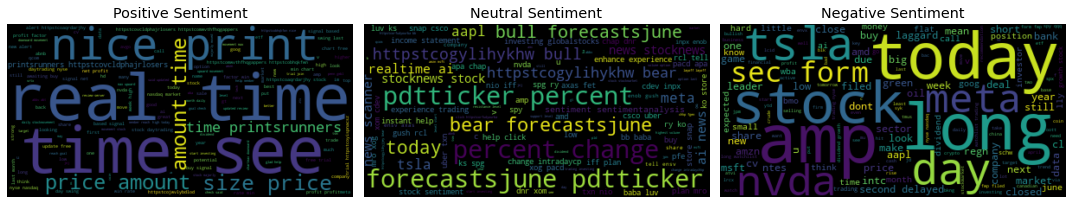

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create separate dataframes for each sentiment class
positive_data = bigcap[bigcap['textblob_sentiment'] == 'Positive']
neutral_data = bigcap[bigcap['textblob_sentiment'] == 'Neutral']
negative_data = bigcap[bigcap['textblob_sentiment'] == 'Negative']

# Concatenate all the text data in each sentiment class
positive_text = ' '.join(positive_data['Tweets'])
neutral_text = ' '.join(neutral_data['Tweets'])
negative_text = ' '.join(negative_data['Tweets'])

# Create word clouds for each sentiment class
positive_wordcloud = WordCloud().generate(positive_text)
neutral_wordcloud = WordCloud().generate(neutral_text)
negative_wordcloud = WordCloud().generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(15, 8))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

# Neutral word cloud
plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()


### actual sentiment

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create separate dataframes for each sentiment class
positive_data = bigcap[bigcap['Manual_Sentiment'] == 'Positive']
neutral_data = bigcap[bigcap['Manual_Sentiment'] == 'Neutral']
negative_data = bigcap[bigcap['Manual_Sentiment'] == 'Negative']

# Concatenate all the text data in each sentiment class
positive_text = ' '.join(positive_data['Tweets'])
neutral_text = ' '.join(neutral_data['Tweets'])
negative_text = ' '.join(negative_data['Tweets'])

# Create word clouds for each sentiment class
positive_wordcloud = WordCloud().generate(positive_text)
neutral_wordcloud = WordCloud().generate(neutral_text)
negative_wordcloud = WordCloud().generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(15, 8))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

# Neutral word cloud
plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()


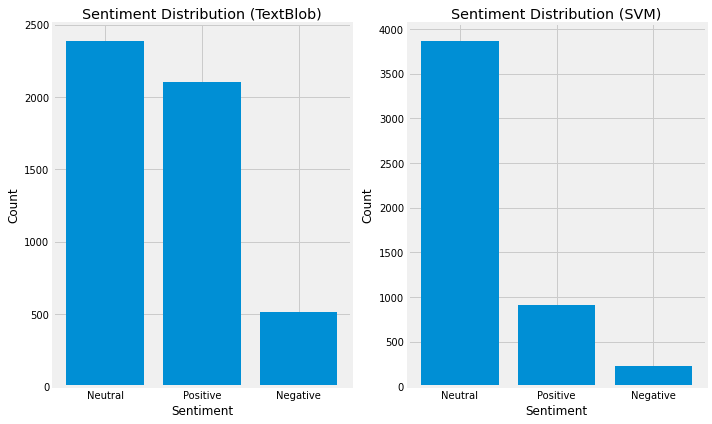

In [32]:
import matplotlib.pyplot as plt

# Calculate the sentiment distribution for TextBlob predictions
textblob_sentiment_distribution = bigcap['textblob_sentiment'].value_counts()

# Calculate the sentiment distribution for SVM predictions
svm_sentiment_distribution = bigcap['svm_sentiment'].value_counts()

# Create a bar plot to visualize the sentiment distribution
plt.figure(figsize=(10, 6))

# TextBlob sentiment distribution
plt.subplot(1, 2, 1)
plt.bar(textblob_sentiment_distribution.index, textblob_sentiment_distribution.values)
plt.title('Sentiment Distribution (TextBlob)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# SVM sentiment distribution
plt.subplot(1, 2, 2)
plt.bar(svm_sentiment_distribution.index, svm_sentiment_distribution.values)
plt.title('Sentiment Distribution (SVM)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


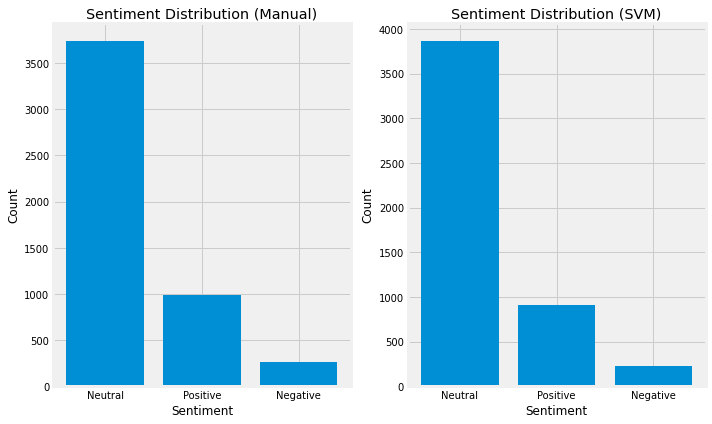

In [33]:
import matplotlib.pyplot as plt

# Calculate the sentiment distribution for TextBlob predictions
textblob_sentiment_distribution = bigcap['Manual_Sentiment'].value_counts()

# Calculate the sentiment distribution for SVM predictions
svm_sentiment_distribution = bigcap['svm_sentiment'].value_counts()

# Create a bar plot to visualize the sentiment distribution
plt.figure(figsize=(10, 6))

# TextBlob sentiment distribution
plt.subplot(1, 2, 1)
plt.bar(textblob_sentiment_distribution.index, textblob_sentiment_distribution.values)
plt.title('Sentiment Distribution (Manual)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# SVM sentiment distribution
plt.subplot(1, 2, 2)
plt.bar(svm_sentiment_distribution.index, svm_sentiment_distribution.values)
plt.title('Sentiment Distribution (SVM)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


<Figure size 720x576 with 0 Axes>

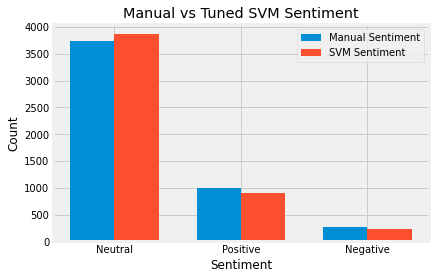

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'bigcap' and contains the 'Manual_Sentiment' and 'svm_sentiment' columns

# Count the occurrences of each sentiment label for 'Manual_Sentiment' column
manual_sentiment_counts = bigcap['Manual_Sentiment'].value_counts()

# Count the occurrences of each sentiment label for 'svm_sentiment' column
svm_sentiment_counts = bigcap['svm_sentiment'].value_counts()

# Get the unique sentiment labels
sentiment_labels = bigcap['Manual_Sentiment'].unique()

# Get the count of each sentiment label for both columns
manual_counts = [manual_sentiment_counts.get(label, 0) for label in sentiment_labels]
svm_counts = [svm_sentiment_counts.get(label, 0) for label in sentiment_labels]

# Sort the data in descending order
sorted_indices = sorted(range(len(manual_counts)), key=lambda i: manual_counts[i], reverse=True)
manual_counts = [manual_counts[i] for i in sorted_indices]
svm_counts = [svm_counts[i] for i in sorted_indices]
sentiment_labels = [sentiment_labels[i] for i in sorted_indices]

# Set the position of the bars on the x-axis
x = range(len(sentiment_labels))

# Set the width of the bars
bar_width = 0.35

plt.figure(figsize=(10, 8))
# Create the grouped bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x, manual_counts, bar_width, label='Manual Sentiment')
rects2 = ax.bar([val + bar_width for val in x], svm_counts, bar_width, label='SVM Sentiment')

# Add labels, title, and legend
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Manual vs Tuned SVM Sentiment')
ax.set_xticks([val + bar_width/2 for val in x])
ax.set_xticklabels(sentiment_labels)
ax.legend()

# Display the chart
plt.show()
